Out of 4869 tweets:
1931 tweets are positive.
1020 tweets are negative.
1918 tweets are neutral.
The average sentiment score is 0.07.


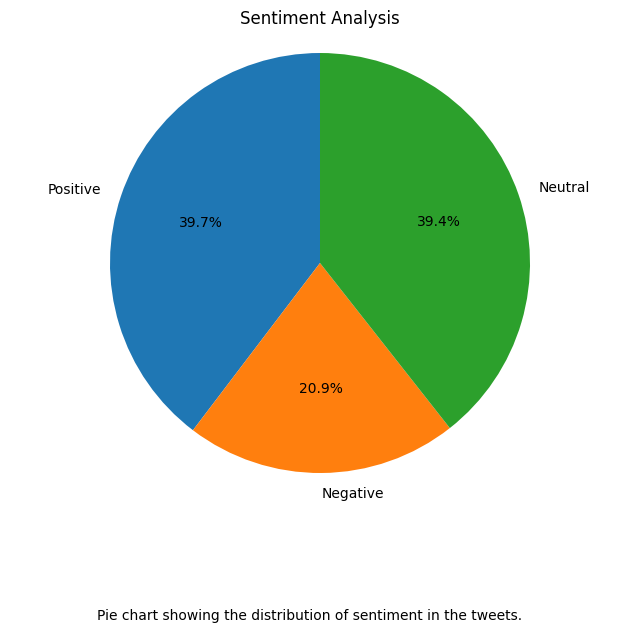

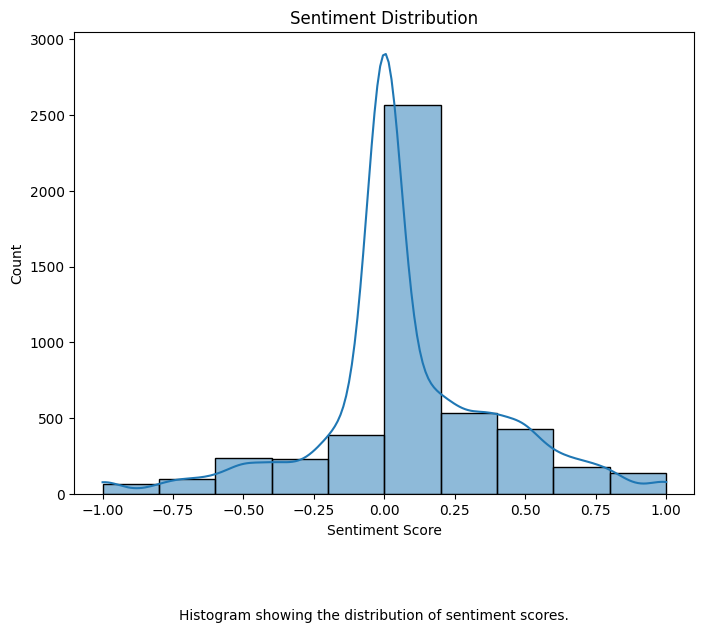

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Read tweets from an Excel file
excel_file = 'LabeledText.xlsx'

df = pd.read_excel(excel_file)
tweet_data = df['Tweet'].tolist()

# Step 2: Perform sentiment analysis
sentiment_scores = []

for tweet in tweet_data:
    if isinstance(tweet, float) and pd.isna(tweet):
        continue  # Skip NaN values
    analysis = TextBlob(str(tweet))  # Convert float to string
    sentiment_scores.append(analysis.sentiment.polarity)

# Step 3: Verbal analysis
total_tweets = len(sentiment_scores)
positive_tweets = sum(score > 0 for score in sentiment_scores)
negative_tweets = sum(score < 0 for score in sentiment_scores)
neutral_tweets = sum(score == 0 for score in sentiment_scores)
average_sentiment = sum(sentiment_scores) / total_tweets

verbal_analysis = f"Out of {total_tweets} tweets:\n"
verbal_analysis += f"{positive_tweets} tweets are positive.\n"
verbal_analysis += f"{negative_tweets} tweets are negative.\n"
verbal_analysis += f"{neutral_tweets} tweets are neutral.\n"
verbal_analysis += f"The average sentiment score is {average_sentiment:.2f}."

print(verbal_analysis)

# Step 4: Visualize the results
# Pie chart
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [positive_tweets, negative_tweets, neutral_tweets]

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis')
plt.axis('equal')
plt.figtext(0.5, -0.1, "Pie chart showing the distribution of sentiment in the tweets.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_scores, bins=10, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.figtext(0.5, -0.1, "Histogram showing the distribution of sentiment scores.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()
